<a href="https://colab.research.google.com/github/stellacherotich/Diabetes-Solutions/blob/main/Diabetes_Solutions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Diabetes Solutions Hackathon**
  `Prevention is better than cure.`

---

Contributors : Jimcollins Wamae, Rosemary Mburu, and Stella Kitur


![diabetes](https://images.unsplash.com/photo-1624454002429-40ed87a5ec04?ixlib=rb-4.0.3&ixid=M3wxMjA3fDB8MHxwaG90by1wYWdlfHx8fGVufDB8fHx8fA%3D%3D&auto=format&fit=crop&w=1770&q=80)

## **Project Overview**

Diabetes affects millions worldwide, posing a significant public health challenge. Early detection and intervention are vital to managing this chronic metabolic disorder effectively. Research tells us that by the year 2030, in Kenya alone we expect that the total diabetes expenditure would be approximately KES 27.3 million, and that would increase to KES 42.5 million by the year 2045.  
Shocking.  
Diabetes, not only impacts at a national level, the impact of its magnitude can be felt at an individual level, as well as those that are close to the person.  
So why does it matter?  
As the *Sugar Control Squad*, we aren't just working on another data science project, but we believe that contributing to finding a solution to diabetes is a life-saving expedition. We aim to develop a predictive model to identify individuals that are at risk of developing diabetes. By leveraging advanced machine learning algorithms and diverse datasets encompassing medical records, lifestyle factors, and demographic information.

## **Problem Statement**

The challenge at hand is to develop a predictive model that can accurately identify individuals at risk of developing diabetes. Leveraging machine learning algorithms and diverse datasets, the model must find meaningful features that contribute to a person's diabetic status, with F1 score as the main success metric – a crucial harmony of precision and recall, particularly relevant in medical cases.


## **Project Objectives**
The primary goal is to find meaningful inferences(features) which in turn will be used in identifying Diabetes in a person, the objectives of the project are therefore the following: <br> <br>
1. **Develop a High-Performing Predictive Model:** Create a robust predictive model with a high F1 score that accurately identifies individuals at risk of developing diabetes. The model will leverage advanced machine learning algorithms and diverse datasets encompassing medical records, lifestyle factors, and demographic information. Achieving a high F1 score ensures a balance between precision and recall, making it well-suited for medical applications.

2. **Uncover Key Factors in Diabetes Risk:** Conduct in-depth feature analysis to identify the most significant factors contributing to an individual's diabetic status. Understanding these key risk factors will provide valuable insights for healthcare professionals, enabling targeted interventions and personalized preventive measures.

3. **Empower Individuals for Proactive Health Management:** Empower individuals to take charge of their health by providing educational resources and personalized lifestyle recommendations based on their risk assessment results. By promoting proactive health management, the project aims to reduce diabetes risk factors and foster a healthier society.

### **Success Metrics**

In our pursuit of developing an accurate predictive model, we have carefully chosen the F1 score as our primary success metric. The F1 score strikes a perfect balance between precision and recall, making it particularly well-suited for medical applications. By prioritizing the F1 score, we ensure that our model excels in identifying both true positive cases and minimizing false negatives, crucial in the context of diabetes risk prediction. This choice aligns with best practices in medical research, guaranteeing that our project's success is measured against the most relevant and impactful metric.


## **Data Understanding**

The data for this project was sourced from [Kaggle](https://www.kaggle.com/datasets/alexteboul/diabetes-health-indicators-dataset) and consists of 253,680 rows and 22 columns. It includes valuable information collected from the Behavioral Risk Factor Surveillance System (BRFSS), a health-related telephone survey conducted annually by the CDC. The survey captures responses from over 400,000 Americans, providing insights into health-related risk behaviors, chronic health conditions, and the utilization of preventive services.


In [1]:
#Importing Libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, f1_score
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.dummy import DummyClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, roc_curve, roc_auc_score, confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE

import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', None)


In [2]:
#Loading the dataset

data = pd.read_csv("diabetes_012_health_indicators_BRFSS2015.csv")

In [3]:
# class to describe dataset

class Describer:

    # initialize object

    def __init__(self, df):
        self.df = df

    # method to check shape of data

    def shape(self):
        out = print(f"The DataFrame has:\n\t* {self.df.shape[0]} rows\n\t* {self.df.shape[1]} columns", '\n')
        return out

    # method to check info on dataset

    def data_info(self):
        out = print(self.df.info(), '\n')
        return out

    # method to describe numerical columns

    def data_describe(self):
        out = self.df.describe()
        return out

    # method to check data types

    def data_type(self):

        print("Data has",len( data.select_dtypes(include='number').columns),
                "Numeric columns")

        print("and", len(data.select_dtypes(include='object').columns),
          "Categorical columns")

        print('*******************')
        print('*******************')

        print('Numerical Columns:', data.select_dtypes(include='number').columns)
        print('Categorical Coulumns:', data.select_dtypes(include='object').columns)

        return None

    # check duplicates

    def check_duplicates(self):
        duplicates = []

        for i in data.duplicated():
            duplicates.append(i)
        duplicates_set = set(duplicates)
        if(len(duplicates_set) == 1):
            print('The Dataset has No Duplicates')

        else:
            duplicates_percentage = np.round(((sum(duplicates)/len(data)) * 100 ), 2)
            print(f'Duplicated rows constitute of {duplicates_percentage} % of our dataset')

        return None

    # method to check missing values

    def missing_values(self):


        if data.isnull().any().any() == False :

            print("There Are No Missing Values")

        else:

            missing_values = data.isnull().sum().sort_values(ascending=False)

            missing_val_percent = ((data.isnull().sum()/len(data)).sort_values(ascending=False))

            missing_df = pd.DataFrame({'Missing Values': missing_values, 'Percentage %': missing_val_percent})

            return missing_df[missing_df['Percentage %'] > 0]



In [4]:
# creating an instance of the class describer

describe_df = Describer(data)

# lets view the shape of the data

describe_df.shape()

# lets check for duplicates

describe_df.check_duplicates()

# lets describe data types

describe_df.data_type()

# lets view the info of the data

describe_df.data_info()

# lets describe numerical cols

describe_df.data_describe()

# lets get missing values

describe_df.missing_values()


The DataFrame has:
	* 253680 rows
	* 22 columns 

Duplicated rows constitute of 9.42 % of our dataset
Data has 22 Numeric columns
and 0 Categorical columns
*******************
*******************
Numerical Columns: Index(['Diabetes_012', 'HighBP', 'HighChol', 'CholCheck', 'BMI', 'Smoker',
       'Stroke', 'HeartDiseaseorAttack', 'PhysActivity', 'Fruits', 'Veggies',
       'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 'GenHlth',
       'MentHlth', 'PhysHlth', 'DiffWalk', 'Sex', 'Age', 'Education',
       'Income'],
      dtype='object')
Categorical Coulumns: Index([], dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253680 entries, 0 to 253679
Data columns (total 22 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Diabetes_012          253680 non-null  float64
 1   HighBP                253680 non-null  float64
 2   HighChol              253680 non-null  float64
 3   CholCheck             25368

In [5]:
data.head(2)

,Diabetes_012,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0
1,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0


In [6]:
duplicats_age = data[data.duplicated(subset=['Age'])]
duplicats_age.head(5)

,Diabetes_012,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
2,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,5.0,30.0,30.0,1.0,0.0,9.0,4.0,8.0
4,0.0,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,2.0,3.0,0.0,0.0,0.0,11.0,5.0,4.0
6,0.0,1.0,0.0,1.0,30.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,3.0,0.0,14.0,0.0,0.0,9.0,6.0,7.0
7,0.0,1.0,1.0,1.0,25.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,3.0,0.0,0.0,1.0,0.0,11.0,4.0,4.0
8,2.0,1.0,1.0,1.0,30.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,5.0,30.0,30.0,1.0,0.0,9.0,5.0,1.0


In [7]:
duplicate_bmi= data[data.duplicated(subset=['BMI'])]

duplicate_bmi.head()

,Diabetes_012,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
5,0.0,1.0,1.0,1.0,25.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,2.0,0.0,2.0,0.0,1.0,10.0,6.0,8.0
7,0.0,1.0,1.0,1.0,25.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,3.0,0.0,0.0,1.0,0.0,11.0,4.0,4.0
8,2.0,1.0,1.0,1.0,30.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,5.0,30.0,30.0,1.0,0.0,9.0,5.0,1.0
9,0.0,0.0,0.0,1.0,24.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,2.0,0.0,0.0,0.0,1.0,8.0,4.0,3.0
10,2.0,0.0,0.0,1.0,25.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,3.0,0.0,0.0,0.0,1.0,13.0,6.0,8.0


Duplicate values are justified in this case, as there is a chance several people had the same age, bmi etc.

In [8]:
data.describe()

,Diabetes_012,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
count,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000
mean,0.296921,0.429001,0.424121,0.962670,28.382364,0.443169,0.040571,0.094186,0.756544,0.634256,0.811420,0.056197,0.951053,0.084177,2.511392,3.184772,4.242081,0.168224,0.440342,8.032119,5.050434,6.053875
std,0.698160,0.494934,0.494210,0.189571,6.608694,0.496761,0.197294,0.292087,0.429169,0.481639,0.391175,0.230302,0.215759,0.277654,1.068477,7.412847,8.717951,0.374066,0.496429,3.054220,0.985774,2.071148
min,0.000000,0.000000,0.000000,0.000000,12.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,1.000000,24.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,6.000000,4.000000,5.000000
50%,0.000000,0.000000,0.000000,1.000000,27.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,8.000000,5.000000,7.000000
75%,0.000000,1.000000,1.000000,1.000000,31.000000,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,3.000000,2.000000,3.000000,0.000000,1.000000,10.000000,6.000000,8.000000
max,2.000000,1.000000,1.000000,1.000000,98.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,5.000000,30.000000,30.000000,1.000000,1.000000,13.000000,6.000000,8.000000


### <b> Data Cleaning </b>

In [9]:
# Rename the columns for easy understanding
data.rename(columns={'Diabetes_012': 'Diabetes_Status'}, inplace=True)
data.head(2)

,Diabetes_Status,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0
1,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0


## <b> Exploratory Data Analysis</b>


In this section we did bivariate, univariate and multivariate analysis to further understand the data.

### Columns Description

These are the columns in the dataset as well as what they represent.

| Column Name        | Description                                                                                                                                                      | Categories/Scale                                    |
|--------------------|------------------------------------------------------------------------------------------------------------------------------------------------------------------|-----------------------------------------------------|
| `Diabetes_Status`       | Diabetes status of the individual                                                                                                                               | 0 = no diabetes<br>1 = prediabetes<br>2 = diabetes   |
| `HighBP`             | High blood pressure status of the individual                                                                                                                     | 0 = no high BP<br>1 = high BP                        |
| `HighChol`           | High cholesterol status of the individual                                                                                                                       | 0 = no high cholesterol<br>1 = high cholesterol      |
| `CholCheck`          | Whether the individual had a cholesterol check in the past 5 years                                                                                               | 0 = no cholesterol check<br>1 = cholesterol check    |
| `BMI`                | Body Mass Index of the individual                                                                                                                                | Numeric value representing BMI                      |
| `Smoker`             | Smoking status of the individual                                                                                                                                 | 0 = not a smoker<br>1 = smoker                       |
| `Stroke`             | Whether the individual has ever been told they had a stroke                                                                                                      | 0 = no stroke<br>1 = stroke                          |
| `HeartDiseaseorAttack` | Whether the individual has coronary heart disease (CHD) or myocardial infarction (MI)                                                                           | 0 = no heart disease or attack<br>1 = heart disease or attack |
| `PhysActivity`       | Whether the individual engaged in physical activity in the past 30 days (excluding job-related activity)                                                        | 0 = no physical activity<br>1 = physical activity     |
| `Fruits`             | Whether the individual consumes fruits one or more times per day                                                                                                | 0 = does not consume fruits<br>1 = consumes fruits    |
| `Veggies`            | Whether the individual consumes vegetables one or more times per day                                                                                            | 0 = does not consume vegetables<br>1 = consumes vegetables |
| `HvyAlcoholConsump`  | Whether the individual is a heavy alcohol consumer                                                                                                              | 0 = not a heavy alcohol consumer<br>1 = heavy alcohol consumer |
| `AnyHealthcare`      | Whether the individual has any kind of health care coverage, including health insurance, prepaid plans, etc.                                                   | 0 = no healthcare coverage<br>1 = healthcare coverage  |
| `NoDocbcCost`        | Whether there was a time in the past 12 months when the individual needed to see a doctor but could not due to cost constraints                              | 0 = no, did not experience cost constraints<br>1 = yes, experienced cost constraints |
| `GenHlth`            | Self-rated general health of the individual on a scale of 1 to 5                                                                                                 | 1 = excellent<br>2 = very good<br>3 = good<br>4 = fair<br>5 = poor |
| `MentHlth`           | Number of days during the past 30 days when the individual's mental health was not good (scale: 1 to 30 days)                                                    | Numeric value representing the number of days       |
| `PhysHlth`           | Number of days during the past 30 days when the individual's physical health was not good (scale: 1 to 30 days)                                                 | Numeric value representing the number of days       |
| `DiffWalk`           | Whether the individual has serious difficulty walking or climbing stairs                                                                                        | 0 = no, no difficulty walking<br>1 = yes, difficulty walking |
| `Sex`                | Gender of the individual                                                                                                                                         | 0 = female<br>1 = male                              |
| `Age`                | Age category of the individual                                                                                                                                   | 1 = 18-24<br>9 = 60-64<br>13 = 80 or older           |
| `Education`          | Education level of the individual                                                                                                                                | 1 = Never attended school or only kindergarten<br>2 = Grades 1 through 8 (Elementary)<br>3 = Grades 9 through 11 (Some high school)<br>4 = Grade 12 or GED (High school graduate)<br>5 = College 1 year to 3 years (Some college or technical school)<br>6 = College 4 years or more (College graduate) |
| `Income`             | Income scale of the individual                                                                                                                                   | 1 = less than $10,000 <br> 5 = less than $35,000<br> 8 = $75,000 or more |


In [10]:
df = data.copy()

#### Mapping the Columns with their respective values

In [11]:
#Diabetes_012
df['Diabetes_Status'] = df['Diabetes_Status'].map({0 : 'no diabetes', 1 : 'prediabetes', 2 : 'diabetes'})
#HighBP
df['HighBP'] = df['HighBP'].map({0 : 'no high BP', 1 : 'high BP'})


In [12]:
#HighChol
df['HighChol'] = df['HighChol'].map({0 : 'no high cholesterol', 1 : 'high cholesterol'})
#CholCheck
df['CholCheck'] = df['CholCheck'].map({0 : 'no cholesterol check in 5 years', 1 : 'yes cholesterol check in 5 years'})
#Smoker
df['Smoker'] = df['Smoker'].map({0 : 'no',1 : 'yes'})
#Stroke
df['Stroke'] = df['Stroke'].map({0 : 'no' ,1 : 'yes'})
#HeartDiseaseorAttack
df['HeartDiseaseorAttack'] = df['HeartDiseaseorAttack'].map({0 : 'no',1 : 'yes'})
#PhysActivity
df['PhysActivity'] = df['PhysActivity'].map({0 : 'no', 1 : 'yes'})
#Fruits
df['Fruits'] = df['Fruits'].map({0 : 'no', 1 : 'yes'})
#Veggies
df['Veggies'] = df['Veggies'].map({0 : 'no',1 : 'yes'})
#HvyAlcoholConsump
df['HvyAlcoholConsump'] = df['HvyAlcoholConsump'].map({0 : 'no', 1: 'yes'})
#AnyHealthcare
df['AnyHealthcare'] = df['AnyHealthcare'].map({0 : 'no', 1 : 'yes'})
#NoDocbcCost
df['NoDocbcCost'] = df['NoDocbcCost'].map({0 : 'no' ,1 : 'yes'})
#GenHlth
df['GenHlth'] = df['GenHlth'].map({1 : 'excellent', 2 : 'very good', 3 : 'good', 4 : 'fair', 5 : 'poor'})

In [13]:
#MentHlth

df['MentHlth'] = df['MentHlth'].map({0.0 :'0Days of mental emotion',30.0 : '30days a month ',2.0 :'2 days a month',
1.0 : '1 day a month ',3.0 :'3 days a month ',5.0  :'5 days a month' ,10.0 :'10 days a month',
15.0 : '15 days a month' ,4.0:'4 days a month' ,7.0  : '7 days a month' ,20.0 :'20 days a month',
14.0 : '14 days a month' ,25.0 : '25 days a month' ,6.0 :'6 days a month' ,8.0 :'8 days a month',
21.0  : '21 days a month' ,12.0  :'12 days a month' ,28.0 :'28 days a month' ,29.0 : '29 days a month',
9.0  : '9 days a month' ,18.0 :'18 days a month' ,16.0 :'16 days a month' ,27.0 :'27 days a month',
17.0 : '17 days a month' ,24.0 : '24 days a month ',22.0 : '22 days a month' ,26.0 :'26 days a month',
13.0 : '13days a month' ,11.0 :'11 days a month' ,23.0 :'23 days a month' ,19.0 :'19 days a month'} )

In [14]:
#PhysHlth

df['PhysHlth'] = df['PhysHlth'].map({0.0 :'0 Physical health days',30.0 : '30days a month ',2.0 :'2 days a month' ,
1.0 : '1 day a month ',3.0 :'3 days a month ',5.0  :'5 days a month' ,10.0 :'10 days a month' ,
15.0 : '15 days a month' ,4.0    :   '4 days a month' ,7.0  : '7 days a month' ,20.0 :'20 days a month',
14.0 : '14 days a month' ,25.0   :   '25 days a month' ,6.0 :'6 days a month' ,8.0 :'8 days a month' ,
21.0  : '21 days a month' ,12.0  :     '12 days a month' ,28.0 :'28 days a month' ,29.0 : '29 days a month' ,
9.0  : '9 days a month' ,18.0    :   '18 days a month' ,16.0 :'16 days a month' ,27.0 :'27 days a month',
17.0 : '17 days a month' ,24.0   :     '24 days a month ',22.0 : '22 days a month' ,26.0 :'26 days a month' ,
13.0 : '13days a month' ,11.0    :    '11 days a month' ,23.0 :'23 days a month' ,19.0 :'19 days a month' })

In [15]:

#DiffWalk
df['DiffWalk'] = df['DiffWalk'].map({0 : 'no', 1 : 'yes'})

#Sex
df['Sex'] = df['Sex'].map({0 : 'female',  1 : 'male'})

#Age
df['Age'] = df['Age'].map({1.0  :   'Age 18 to 24',2.0  :   'Age 25 to 29',3.0   :  'Age 30 to 34',
4.0  :   'Age 35 to 39',5.0   :  'Age 40 to 44',6.0  :   'Age 45 to 49',7.0  :   'Age 50 to 54',8.0  :   'Age 55 to 59',
9.0  :   'Age 60 to 64',10.0  :  'Age 65 to 69',11.0  :  'Age 70 to 74',12.0  :  'Age 75 to 79',13.0  :  'Age 80 or older'})



In [16]:
#income
df['Income'] = df['Income'].map({1.0  :  'Less than $10,000',2.0   :  'Less than $15,000 ($10,000 to less than $15,000)',
3.0   :  'Less than $20,000 ($15,000 to less than $20,000)',4.0   :  'Less than $25,000 ($20,000 to less than $25,000)',
5.0   :  'Less than $35,000 ($25,000 to less than $35,000)',6.0   :   'Less than $50,000 ($35,000 to less than $50,000)',
7.0   :   'Less than $75,000 ($50,000 to less than $75,000)',8.0  :   '$75,000 or more 115,312 26.32 26.59'})


In [17]:
# education

df['Education']=df['Education'].map({1.0 :'Never attended school or only kindergarten',2.0:'Grades 1 through 8 (Elementary)',
3.0:'Grades 9 through 11 (Some high school)', 4.0 : 'Grade 12 or GED (High school graduate)',
5.0 :"College 1 year to 3 years (Some college or technical school)",6.0   :  'College 4 years or more (College graduate)'})


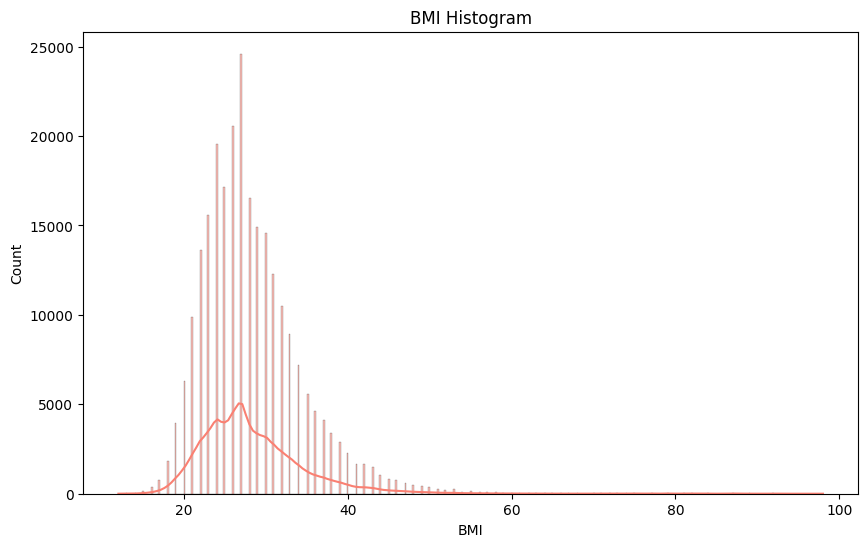

In [18]:
# Create visualisations for the : Age, BMI, Income, High BP

plt.figure(figsize=(10, 6))

sns.histplot(df['BMI'], kde=True, color='salmon')
plt.title('BMI Histogram')

plt.show()

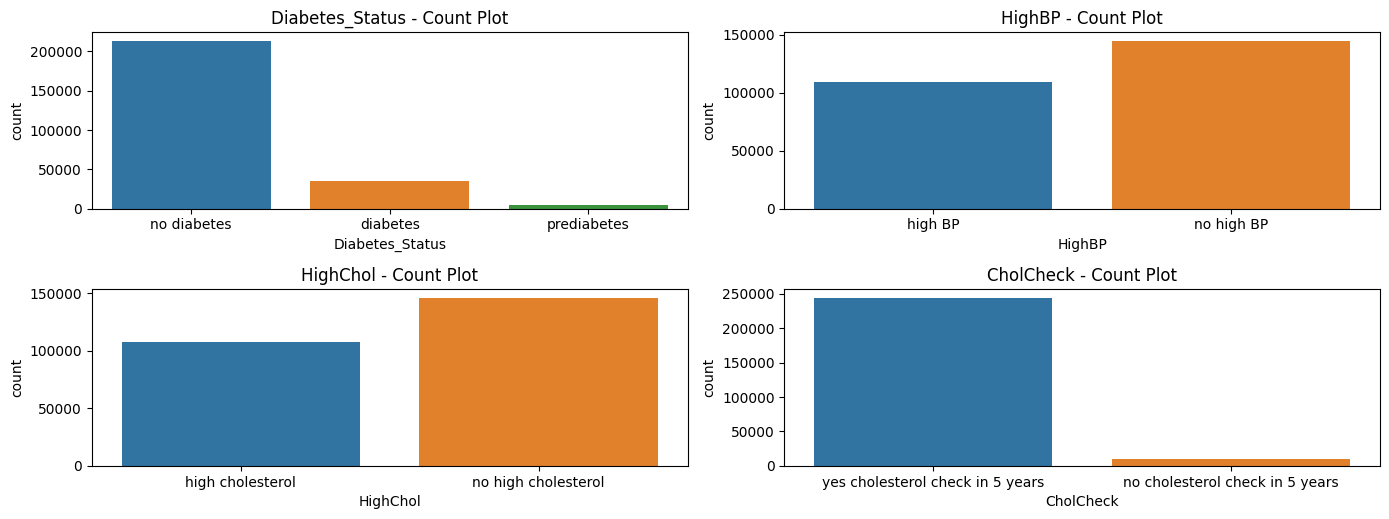

In [19]:
# Categorical column plots
categorical_columns = ['Diabetes_Status', 'HighBP', 'HighChol', 'CholCheck']

# Bar plots for categorical columns
plt.figure(figsize=(14, 10))
for i, col in enumerate(categorical_columns, 1):
    plt.subplot(4, 2, i)
    sns.countplot(x=col, data=df)
    plt.title(f'{col} - Count Plot')


plt.tight_layout()
plt.show()

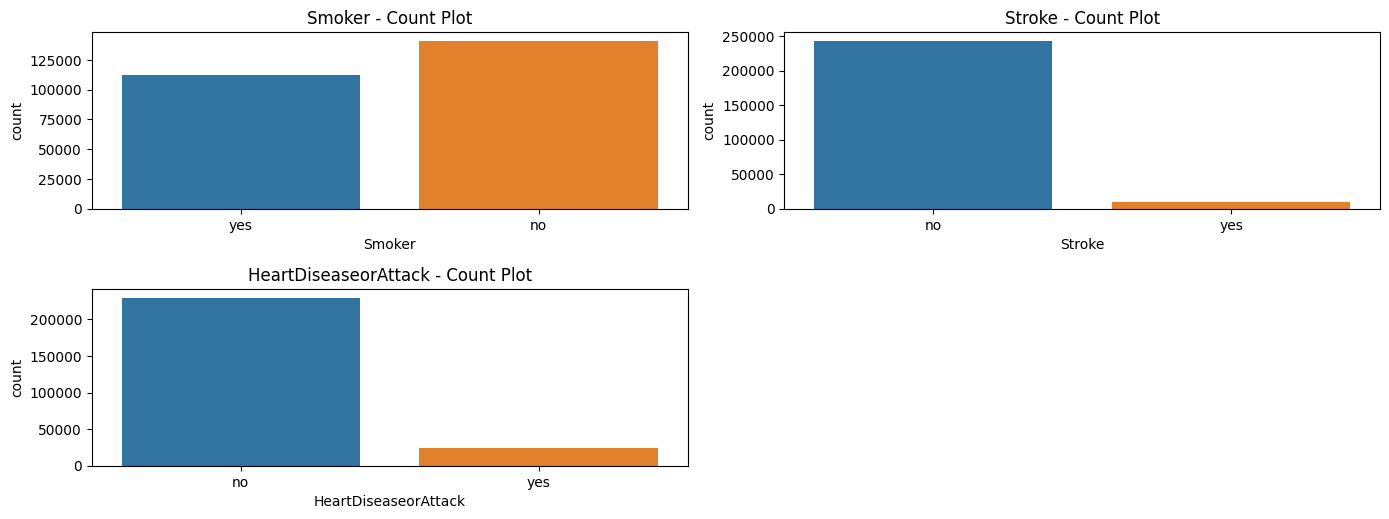

In [20]:
# Categorical column plots
categorical_columns = ['Smoker','Stroke', 'HeartDiseaseorAttack']

# Bar plots for categorical columns
plt.figure(figsize=(14, 10))
for i, col in enumerate(categorical_columns, 1):
    plt.subplot(4, 2, i)
    sns.countplot(x=col, data=df)
    plt.title(f'{col} - Count Plot')


plt.tight_layout()
plt.show()

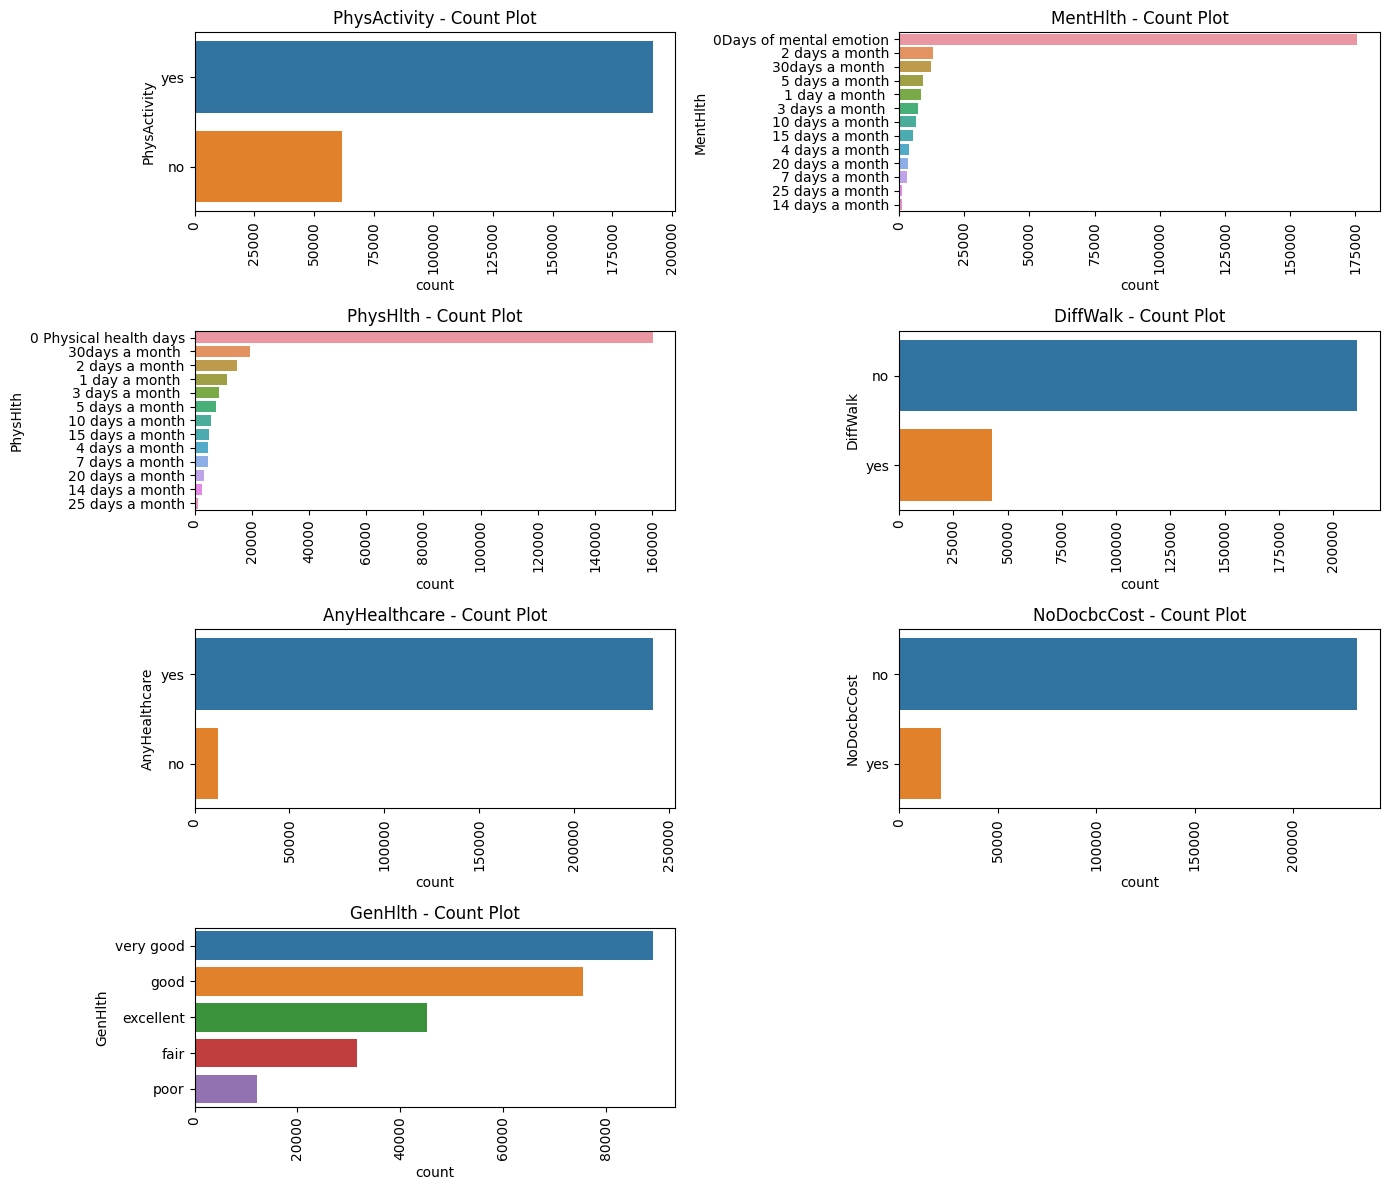

In [21]:
# Categorical column plots
categorical_columns = ['PhysActivity','MentHlth', 'PhysHlth', 'DiffWalk','AnyHealthcare', 'NoDocbcCost', 'GenHlth']

# Bar plots for categorical columns
plt.figure(figsize=(14,12))
for i, col in enumerate(categorical_columns, 1):
    # Get the value counts for the column and sort them in descending order
    value_counts_sorted = df[col].value_counts().sort_values(ascending=False).head(13)

    plt.subplot(4, 2, i)
    sns.barplot(y=value_counts_sorted.index, x=value_counts_sorted)
    plt.xticks(rotation=90)
    plt.title(f'{col} - Count Plot')

plt.tight_layout()
plt.show()

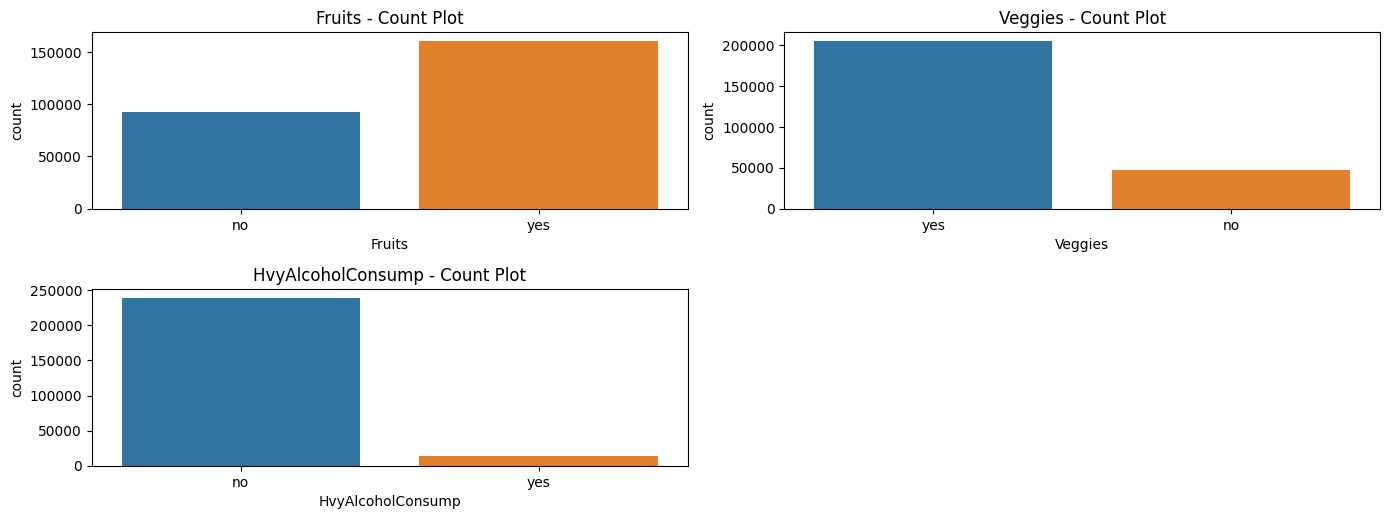

In [22]:
# Categorical column plots
categorical_columns = ['Fruits', 'Veggies','HvyAlcoholConsump',]

# Bar plots for categorical columns
plt.figure(figsize=(14, 10))
for i, col in enumerate(categorical_columns, 1):
    plt.subplot(4, 2, i)
    sns.countplot(x=col, data=df)
    plt.title(f'{col} - Count Plot')


plt.tight_layout()
plt.show()

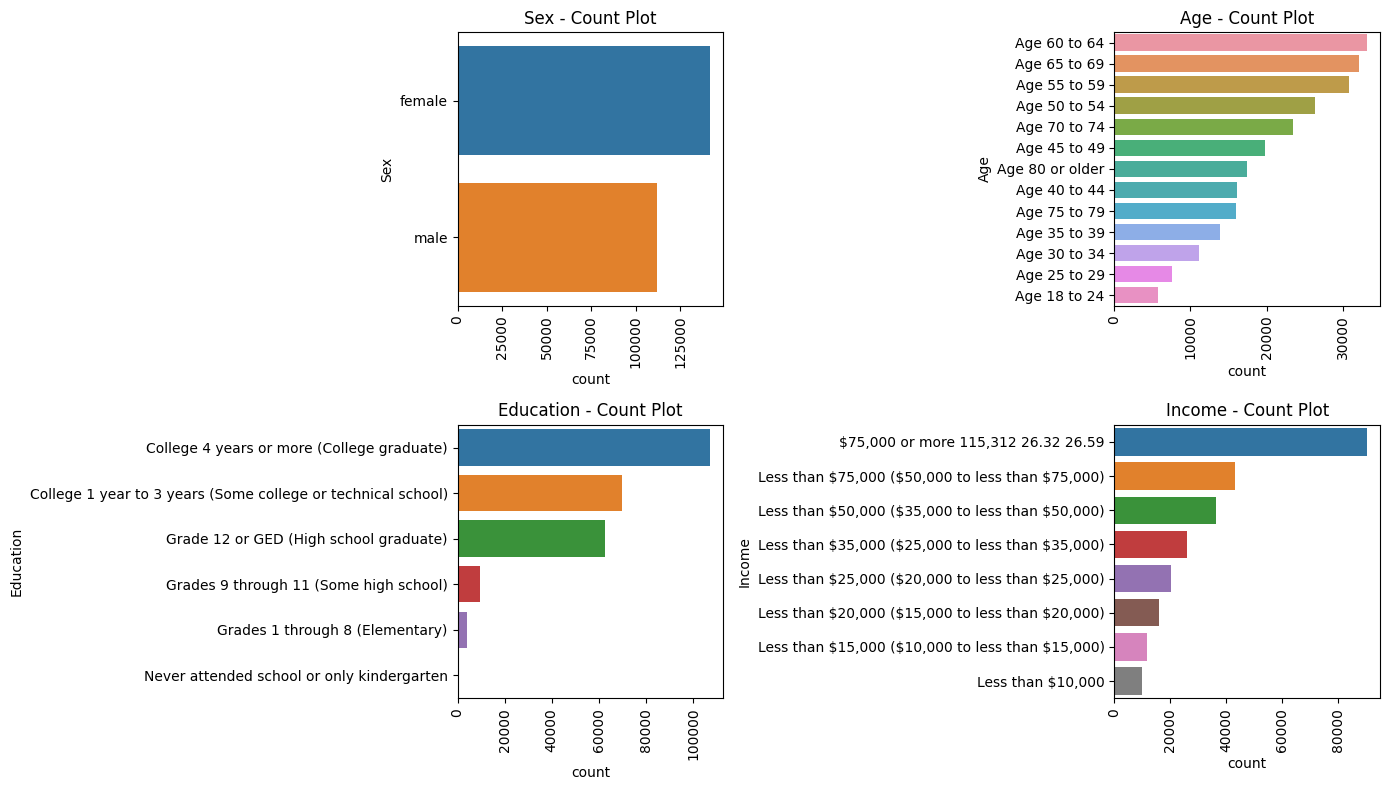

In [23]:
# Categorical column plots
categorical_columns = ['Sex', 'Age', 'Education', 'Income']

plt.figure(figsize=(14, 8))
for i, col in enumerate(categorical_columns, 1):
    # Get the value counts for the column and sort them in descending order
    value_counts_sorted = df[col].value_counts().sort_values(ascending=False).head(13)

    plt.subplot(2, 2, i)
    sns.barplot(y=value_counts_sorted.index, x=value_counts_sorted)
    plt.xticks(rotation=90)
    plt.title(f'{col} - Count Plot')

plt.tight_layout()
plt.show()

#### Dealing with Outliers

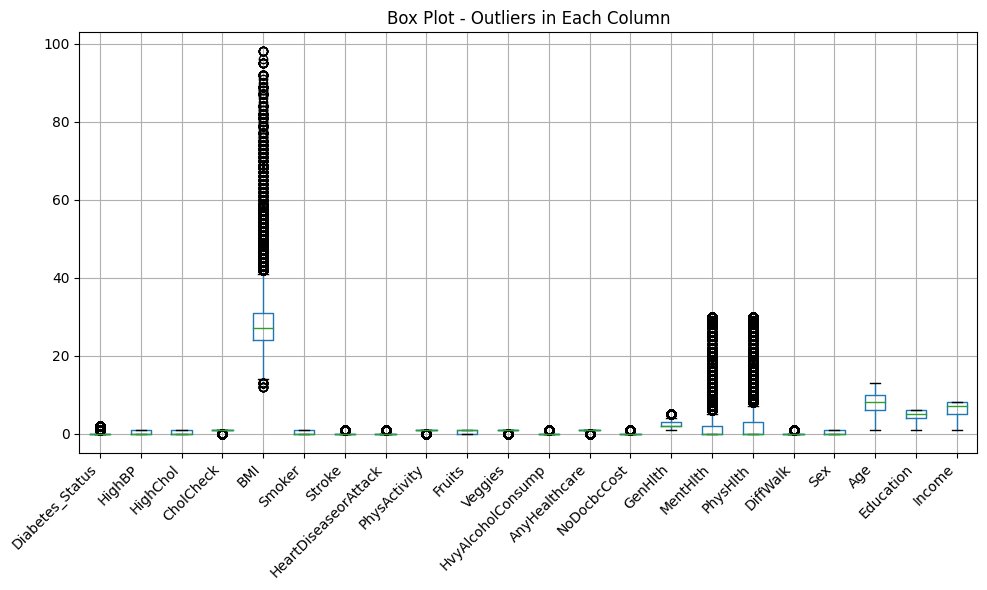

In [24]:
# Checking for outliers

def plot_outliers(data):

    fig, ax = plt.subplots(figsize=(10, 6))
    data.boxplot(ax=ax)
    ax.set_xticklabels(data.columns, rotation=45, ha='right')
    ax.set_title('Box Plot - Outliers in Each Column')
    plt.tight_layout()
    plt.show()

# Call the function to plot outliers
plot_outliers(data)

In [25]:
z_scores = np.abs((data['BMI'] - data['BMI'].mean()) / data['BMI'].std())

# Define a threshold to determine outliers (you can adjust this threshold as needed)
z_score_threshold = 3

# Print the outliers in the 'bmi' column
outliers = data[z_scores > z_score_threshold]
outliers.head()

,Diabetes_Status,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
201,2.0,1.0,1.0,1.0,55.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,4.0,0.0,15.0,0.0,0.0,11.0,5.0,2.0
203,0.0,1.0,1.0,1.0,49.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,3.0,15.0,1.0,0.0,0.0,9.0,6.0,6.0
417,2.0,1.0,1.0,1.0,49.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,3.0,10.0,15.0,1.0,0.0,10.0,3.0,1.0
658,1.0,0.0,0.0,1.0,50.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,2.0,3.0,8.0,0.0,0.0,3.0,5.0,6.0
670,2.0,1.0,0.0,1.0,59.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,3.0,0.0,0.0,0.0,0.0,5.0,6.0,1.0


In [26]:
data = data[data['BMI']>=12]
data

,Diabetes_Status,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0
1,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0
2,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,5.0,30.0,30.0,1.0,0.0,9.0,4.0,8.0
3,0.0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,2.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0
4,0.0,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,2.0,3.0,0.0,0.0,0.0,11.0,5.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
253675,0.0,1.0,1.0,1.0,45.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,3.0,0.0,5.0,0.0,1.0,5.0,6.0,7.0
253676,2.0,1.0,1.0,1.0,18.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,4.0,0.0,0.0,1.0,0.0,11.0,2.0,4.0
253677,0.0,0.0,0.0,1.0,28.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,2.0,5.0,2.0
253678,0.0,1.0,0.0,1.0,23.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,3.0,0.0,0.0,0.0,1.0,7.0,5.0,1.0


In [27]:
data = data.drop(data[(data['BMI'] >= 50)].index)

In [28]:
data

,Diabetes_Status,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0
1,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0
2,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,5.0,30.0,30.0,1.0,0.0,9.0,4.0,8.0
3,0.0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,2.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0
4,0.0,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,2.0,3.0,0.0,0.0,0.0,11.0,5.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
253675,0.0,1.0,1.0,1.0,45.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,3.0,0.0,5.0,0.0,1.0,5.0,6.0,7.0
253676,2.0,1.0,1.0,1.0,18.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,4.0,0.0,0.0,1.0,0.0,11.0,2.0,4.0
253677,0.0,0.0,0.0,1.0,28.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,2.0,5.0,2.0
253678,0.0,1.0,0.0,1.0,23.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,3.0,0.0,0.0,0.0,1.0,7.0,5.0,1.0


In [29]:
outliers[outliers.Diabetes_Status == 'diabetes'].head()

,Diabetes_Status,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income


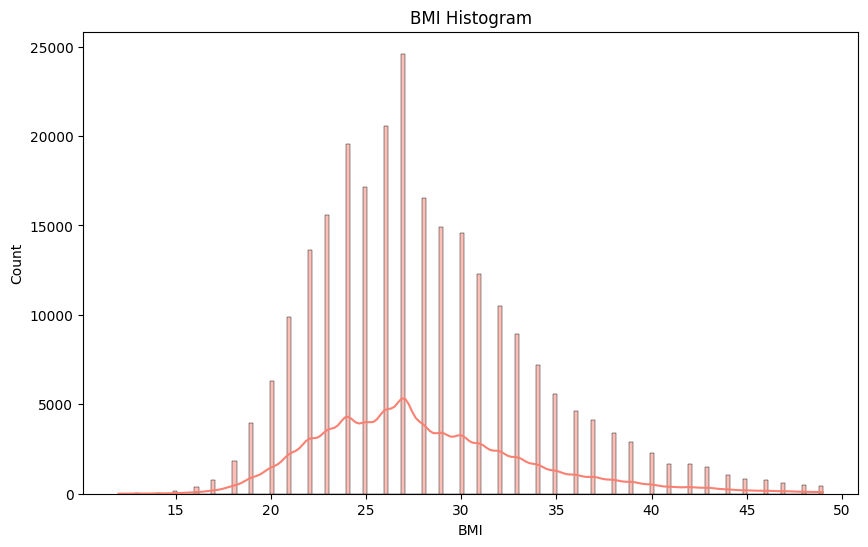

In [30]:
# Create visualisations for the : Age, BMI, Income, High BP

plt.figure(figsize=(10, 6))

sns.histplot(data['BMI'], kde=True, color='salmon')
plt.title('BMI Histogram')

plt.show()

### Summary of Outliers

In order to preserve the data integrity, the outliers were dropped from the dataset.

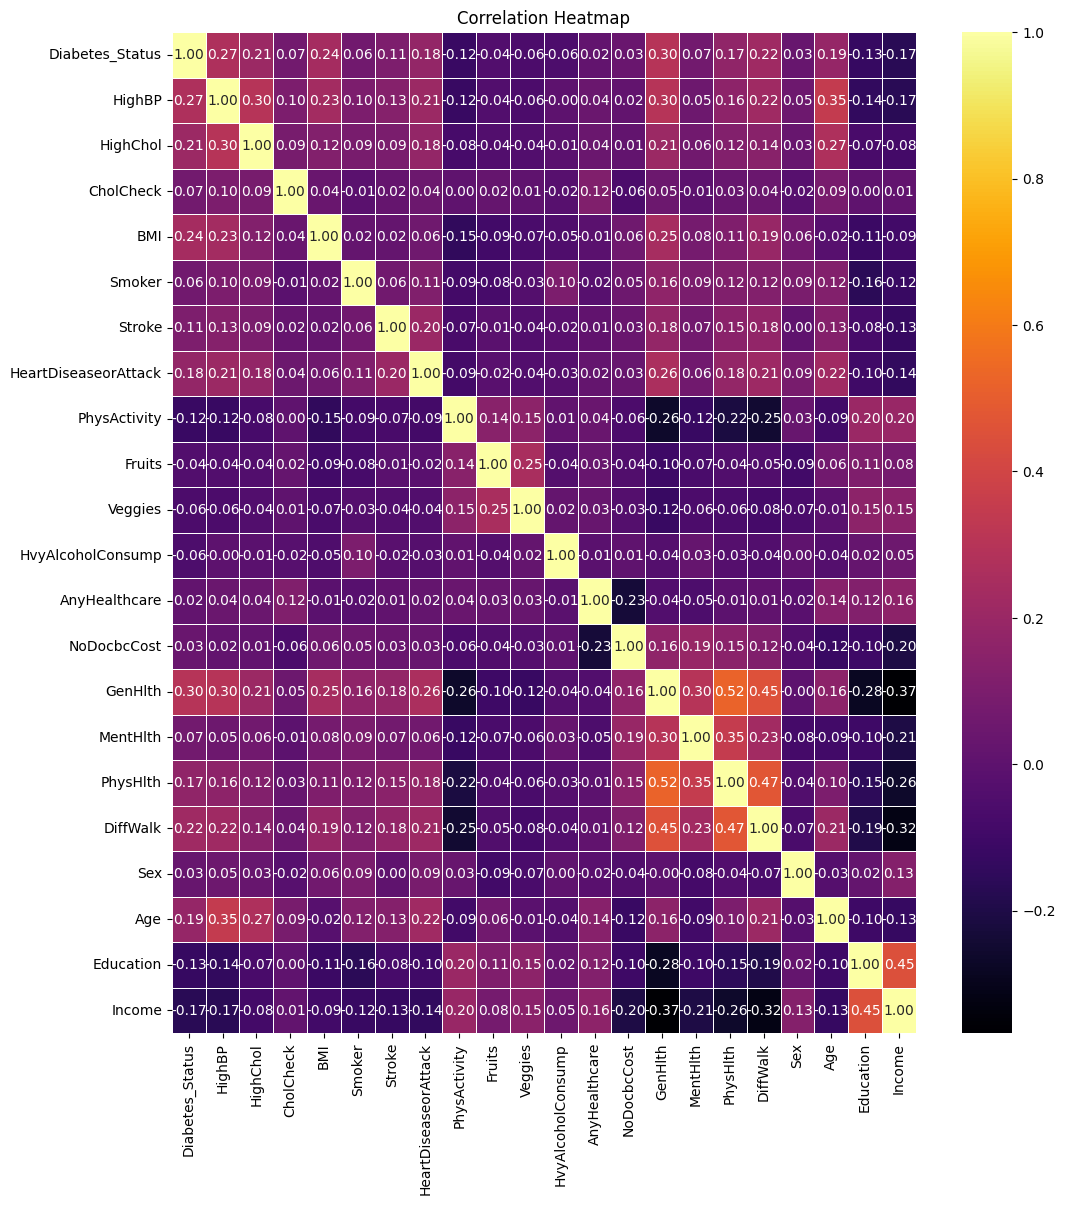

In [31]:
# Correlation heat map

corr_matrix = data.corr()
plt.figure(figsize=(12, 13))
sns.heatmap(corr_matrix, annot=True, cmap='inferno', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

In [32]:
data.corr()['Diabetes_Status'].sort_values(ascending=False)


Diabetes_Status         1.000000
GenHlth                 0.299225
HighBP                  0.269407
BMI                     0.238435
DiffWalk                0.218609
HighChol                0.208217
Age                     0.187124
HeartDiseaseorAttack    0.180618
PhysHlth                0.171466
Stroke                  0.107169
MentHlth                0.070473
CholCheck               0.067075
Smoker                  0.063543
NoDocbcCost             0.033907
Sex                     0.033045
AnyHealthcare           0.015971
Fruits                 -0.041113
HvyAlcoholConsump      -0.057319
Veggies                -0.058466
PhysActivity           -0.117872
Education              -0.129122
Income                 -0.168762
Name: Diabetes_Status, dtype: float64

In [33]:
corr_matrix

,Diabetes_Status,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
Diabetes_Status,1.000000,0.269407,0.208217,0.067075,0.238435,0.063543,0.107169,0.180618,-0.117872,-0.041113,-0.058466,-0.057319,0.015971,0.033907,0.299225,0.070473,0.171466,0.218609,0.033045,0.187124,-0.129122,-0.168762
HighBP,0.269407,1.000000,0.298669,0.098346,0.233205,0.098059,0.129768,0.209445,-0.122592,-0.039641,-0.060565,-0.003270,0.038678,0.016505,0.298060,0.054067,0.158026,0.219599,0.053627,0.346587,-0.140351,-0.169012
HighChol,0.208217,0.298669,1.000000,0.085899,0.123325,0.091309,0.092829,0.181001,-0.077035,-0.040938,-0.039657,-0.011358,0.042603,0.013157,0.208683,0.061515,0.120958,0.144163,0.031729,0.272784,-0.070229,-0.084925
CholCheck,0.067075,0.098346,0.085899,1.000000,0.038093,-0.009960,0.024301,0.044447,0.004699,0.024120,0.006162,-0.023813,0.117977,-0.059047,0.046555,-0.009192,0.031338,0.040073,-0.021858,0.090535,0.001623,0.014604
BMI,0.238435,0.233205,0.123325,0.038093,1.000000,0.019547,0.021397,0.059749,-0.146635,-0.090635,-0.065376,-0.050575,-0.013875,0.056781,0.245867,0.078756,0.112020,0.188748,0.060370,-0.021935,-0.111004,-0.092783
Smoker,0.063543,0.098059,0.091309,-0.009960,0.019547,1.000000,0.061102,0.114837,-0.088261,-0.077773,-0.031308,0.101683,-0.023673,0.049736,0.164546,0.092427,0.117049,0.123657,0.093658,0.120962,-0.162541,-0.124917
Stroke,0.107169,0.129768,0.092829,0.024301,0.021397,0.061102,1.000000,0.203368,-0.068650,-0.013206,-0.040844,-0.017069,0.008671,0.034404,0.178205,0.070217,0.148943,0.176991,0.003420,0.127174,-0.075859,-0.128389
HeartDiseaseorAttack,0.180618,0.209445,0.181001,0.044447,0.059749,0.114837,0.203368,1.000000,-0.086587,-0.019820,-0.039180,-0.029040,0.018914,0.030831,0.258744,0.064118,0.181239,0.213142,0.086749,0.222327,-0.099506,-0.140520
PhysActivity,-0.117872,-0.122592,-0.077035,0.004699,-0.146635,-0.088261,-0.068650,-0.086587,1.000000,0.141952,0.152971,0.011863,0.035428,-0.060470,-0.262848,-0.123015,-0.215605,-0.248500,0.031138,-0.093580,0.199769,0.196721
Fruits,-0.041113,-0.039641,-0.040938,0.024120,-0.090635,-0.077773,-0.013206,-0.019820,0.141952,1.000000,0.253968,-0.035612,0.031499,-0.043913,-0.102952,-0.067472,-0.043838,-0.046649,-0.091605,0.063865,0.109834,0.079096


# Pre-Processing & Feature Engineering

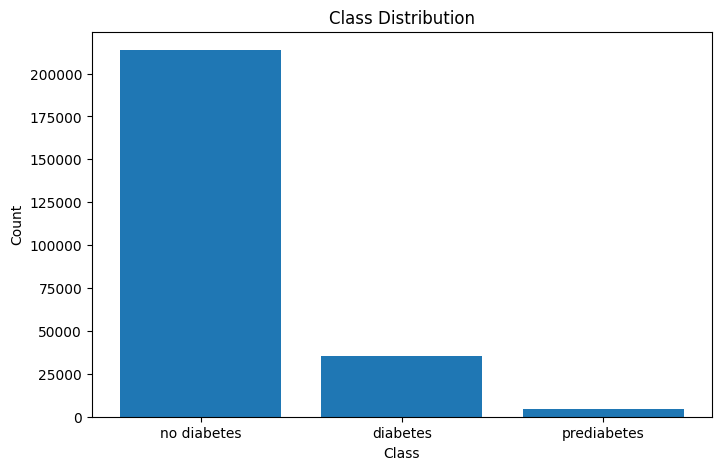

Class Imbalance Ratio: 0.02


In [34]:
# Dealing with the class imbalance

target_column = 'Diabetes_Status'

# Count the occurrences of each class in the target variable
class_counts = df[target_column].value_counts()

# Plot the class distribution
plt.figure(figsize=(8, 5))
plt.bar(class_counts.index, class_counts.values)
plt.xlabel('Class')
plt.ylabel('Count')
plt.title('Class Distribution')
plt.show()

# Calculate class imbalance ratio
imbalance_ratio = class_counts.min() / class_counts.max()
print(f'Class Imbalance Ratio: {imbalance_ratio:.2f}')

### Feature Engineering the Columns

In [35]:
data = data[data['Diabetes_Status'] != 1.0]

data['Diabetes_Status'].value_counts()

Diabetes_Status
0.0    212086
2.0     34495
Name: count, dtype: int64

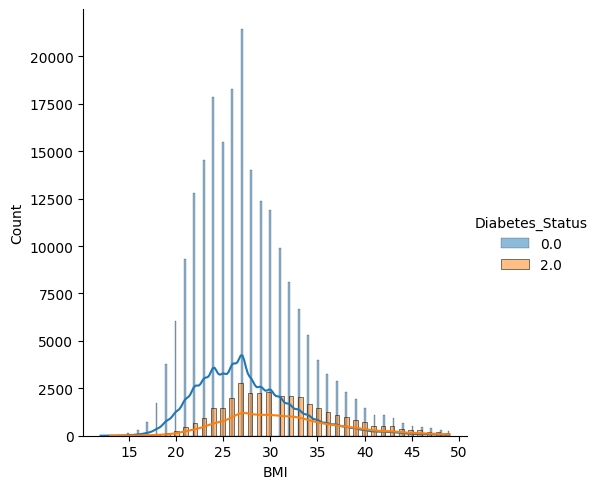

In [36]:
sns.FacetGrid(data, hue='Diabetes_Status', height=5).map(sns.histplot,
                                                'BMI',kde=True).add_legend()

In [37]:
dia_yes = data.loc[data['Diabetes_Status']==2.0]
dia_no =data.loc[data['Diabetes_Status']==0.0]

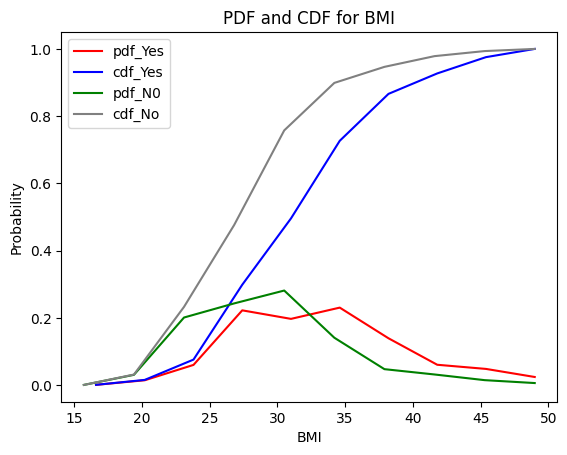

In [38]:
counts, bin_edges = np.histogram(dia_yes['BMI'])
pdf=counts/sum(counts)
cdf=np.cumsum(pdf)
plt.plot(bin_edges[1:], pdf,'r', label='pdf_Yes', color='red') 
plt.plot(bin_edges[1:], cdf,'r', label='cdf_Yes', color='blue') 

counts, bin_edges = np.histogram(dia_no['BMI'])
pdf=counts/sum(counts)
cdf=np.cumsum(pdf)
plt.plot(bin_edges[1:], pdf,'r', label='pdf_N0', color='green') 
plt.plot(bin_edges[1:], cdf,'r', label='cdf_No', color='grey') 
plt.xlabel('BMI')
plt.ylabel('Probability')
plt.title('PDF and CDF for BMI')
plt.legend()
plt.show()

In [37]:
data['Diet'] = data['Fruits']\
              + data['Veggies']

In [38]:
data['HighBP_Chol'] = data['HighBP'] \
          + data['HighChol']

In [39]:
data.head()

,Diabetes_Status,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income,Diet,HighBP_Chol
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0,1.0,2.0
1,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0,0.0,0.0
2,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,5.0,30.0,30.0,1.0,0.0,9.0,4.0,8.0,1.0,2.0
3,0.0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,2.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0,2.0,1.0
4,0.0,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,2.0,3.0,0.0,0.0,0.0,11.0,5.0,4.0,2.0,2.0


High Blood Pressure and Cholestrol are important factors that determine whether an individual has diabetes or may be at risk of getting diabetes. For this reason, we have combined the two.

Additionally, the columns `Fruits` and `Veggies` have been merged into a new column `Diet`.

### Splitting the Dataset

In [40]:
# Define the target and features label

#Feature
X = data.drop(['Diabetes_Status','Sex','Fruits','Veggies','HighBP','HighChol'], axis=1)

#Target
y = data['Diabetes_Status']

# Perform train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=.25)

# print the shapes of the four datasets
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((186786, 18), (62263, 18), (186786,), (62263,))

In [41]:
#Standard Scaling
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [42]:
#instantiate oversampled model
print('Original dataset shape {}'.format(Counter(y_train)))
sm = SMOTE(random_state=20)
train_input_new, train_output_new = sm.fit_resample(X_train_scaled, y_train)
print('New dataset shape {}'.format(Counter(train_output_new)))

Original dataset shape Counter({0.0: 160324, 2.0: 26462})
New dataset shape Counter({0.0: 160324, 2.0: 160324})


In [43]:
X.columns #inspecting the columns

Index(['CholCheck', 'BMI', 'Smoker', 'Stroke', 'HeartDiseaseorAttack',
       'PhysActivity', 'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost',
       'GenHlth', 'MentHlth', 'PhysHlth', 'DiffWalk', 'Age', 'Education',
       'Income', 'Diet', 'HighBP_Chol'],
      dtype='object')

# Modeling

The Models utilised are:
1. Gradient Boost
2. Random Forest
3. Logistic Regression

#### <b> Gradient Boost </b>

In [53]:
# Apply standard scaling to the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Apply SMOTE to oversample the minority class
smote = SMOTE(sampling_strategy='auto', random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train_scaled, y_train)

# Create a GradientBoostingClassifier
gb_model = GradientBoostingClassifier(random_state=42)

# Fit the model on the resampled training data
gb_model.fit(X_train_resampled, y_train_resampled)

# Predict the test set result
y_pred = gb_model.predict(X_test_scaled)

# Evaluate the model
accuracy = gb_model.score(X_test_scaled, y_test)
print(f"Training score: {gb_model.score(X_train_resampled, y_train_resampled)}")
print(f"Test Score: {accuracy}")

# Print the classification report
print(classification_report(y_test, y_pred))

Training score: 0.8818611062598238
Test Score: 0.831424762700159
              precision    recall  f1-score   support

         0.0       0.92      0.89      0.90     53379
         2.0       0.42      0.51      0.46      8884

    accuracy                           0.83     62263
   macro avg       0.67      0.70      0.68     62263
weighted avg       0.85      0.83      0.84     62263



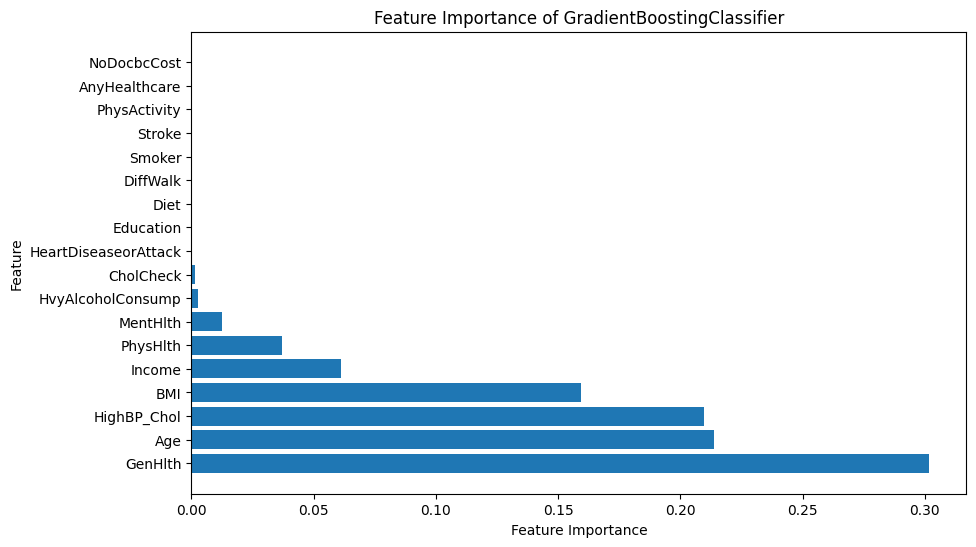

In [47]:
# Feature Importance for the GB Model

feature_importances = gb_model.feature_importances_

# Map feature names to their importance values
feature_names = X.columns
importance_dict = dict(zip(feature_names, feature_importances))

# Sort feature importance values in descending order
sorted_importance_dict = dict(sorted(importance_dict.items(), key=lambda x: x[1], reverse=True))


# Plot the feature importances as a horizontal bar chart
plt.figure(figsize=(10, 6))
plt.barh(range(len(sorted_importance_dict)), list(sorted_importance_dict.values()), align='center')
plt.yticks(range(len(sorted_importance_dict)), list(sorted_importance_dict.keys()))
plt.xlabel("Feature Importance")
plt.ylabel("Feature")
plt.title("Feature Importance of GradientBoostingClassifier")
plt.show()

Based on the feature importance of the Gradient Boost model, the key features in predicting whether an individual has diabetes or not, include the following:

1. `GenHlth`
2. `Age`
3. `HighBP_Chol`
4. `Income`
5. `PhysHlth`

#### <b> Random Forest </b>

Training score: 0.982011499791205
Test Score: 0.8476141528676743


Classification Report
_____
              precision    recall  f1-score   support

         0.0       0.89      0.94      0.91     53379
         2.0       0.45      0.30      0.36      8884

    accuracy                           0.85     62263
   macro avg       0.67      0.62      0.64     62263
weighted avg       0.83      0.85      0.83     62263



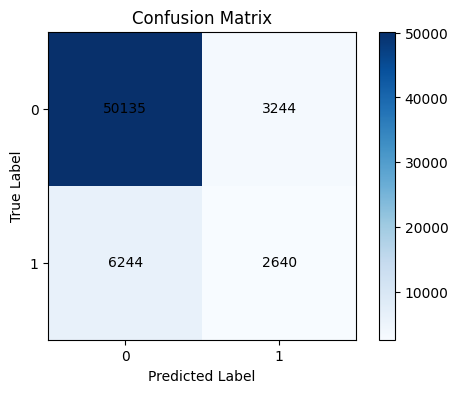


ROC-AUC Score: 0.7974782817448938


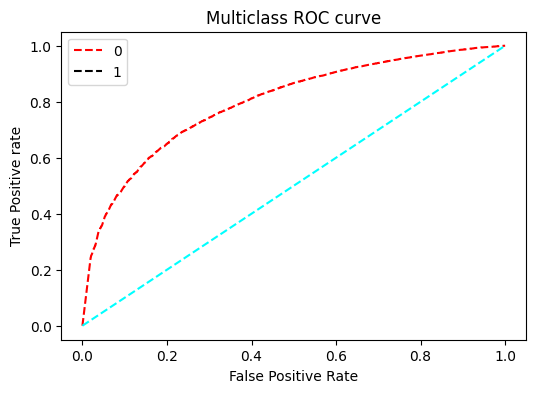

In [52]:
# Apply standard scaling to the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Apply SMOTE to oversample the minority classes
smote = SMOTE(sampling_strategy='auto', random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train_scaled, y_train)

# Create a RandomForestClassifier with custom class_weight
rf_model_final = RandomForestClassifier(criterion='entropy', max_depth=31, max_features=0.5, random_state=42, class_weight='balanced')


# Fit the model on the resampled training data
rf_model_final.fit(X_train_resampled, y_train_resampled)

# Predict
y_pred = rf_model_final.predict(X_test_scaled)


# Instantiate the MulticlassEvaluator class
class MulticlassEvaluator:
    def __init__(self, n_class=2):
        self.n_class = n_class

    def evaluate(self, y_true, y_pred, X_test, X_train, clf):
        print(f"Training score: {clf.score(X_train, y_train)}\nTest Score: {clf.score(X_test, y_test)}")

        # Print classification report
        print('\n')
        print('Classification Report')
        print('_____')
        print(classification_report(y_true=y_true, y_pred=y_pred))

        # Calculate the confusion matrix
        cm = confusion_matrix(y_true, y_pred)

        # Create a figure for the confusion matrix heatmap
        plt.figure(figsize=(6, 4))
        plt.imshow(cm, interpolation='nearest', cmap='Blues')
        plt.title('Confusion Matrix')
        plt.colorbar()
        tick_marks = np.arange(len(np.unique(y_true)))
        plt.xticks(tick_marks, ['0', '1'])
        plt.yticks(tick_marks, ['0', '1'])

        # Add labels to the heatmap
        for i in range(len(np.unique(y_true))):
            for j in range(len(np.unique(y_true))):
                plt.text(j, i, str(cm[i, j]), horizontalalignment='center', verticalalignment='center')

        plt.xlabel('Predicted Label')
        plt.ylabel('True Label')
        plt.show()

        pred_prob = clf.predict_proba(X_test)

        # Plot the ROC curve
        fpr = {}
        tpr = {}
        thresh = {}

        for i in range(self.n_class):
            fpr[i], tpr[i], thresh[i] = roc_curve(y_true, pred_prob[:, i], pos_label=i)

        plt.figure(figsize=(6, 4))
        plt.plot(fpr[0], tpr[0], linestyle='--', color='red', label='0')
        plt.plot(fpr[1], tpr[1], linestyle='--', color='black', label='1')

        plt.title('Multiclass ROC curve')
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive rate')
        plt.legend(loc='best')
        plt.plot([0, 1], [0, 1], ls='--', color='cyan')

        # Calculate and print the ROC-AUC score
        roc_auc = roc_auc_score(y_true, pred_prob[:, 1])
        print(f"\nROC-AUC Score: {roc_auc}")


# Instantiate the MulticlassEvaluator and evaluate the model
evaluator = MulticlassEvaluator()
evaluator.evaluate(y_test, y_pred, X_test_scaled, X_train_scaled, rf_model_final)


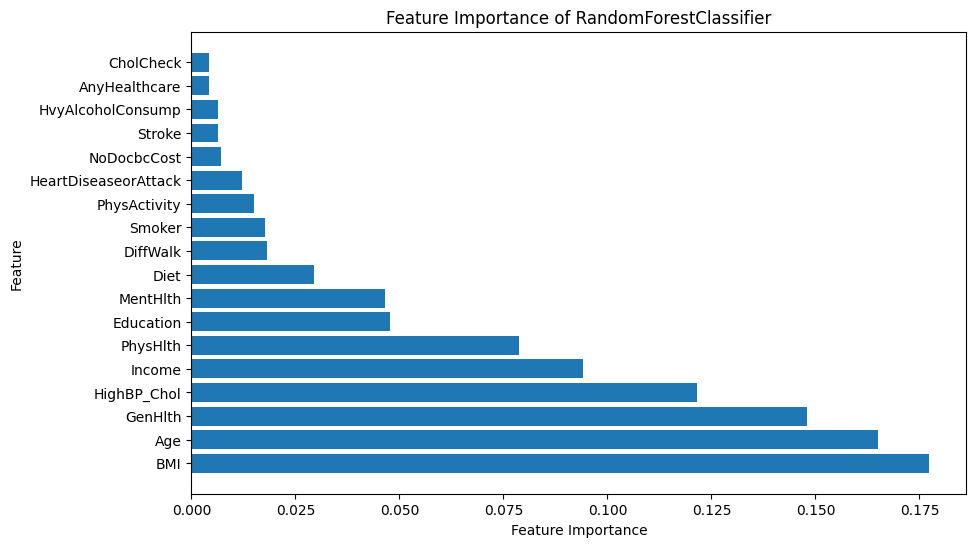

In [ ]:
# Get feature importances from the trained model
feature_importances = rf_model_final.feature_importances_

# Map feature names to their importance values
feature_names = X.columns
importance_dict = dict(zip(feature_names, feature_importances))

# Sort feature importance values in descending order
sorted_importance_dict = dict(sorted(importance_dict.items(), key=lambda x: x[1], reverse=True))

# Plot the feature importances as a horizontal bar chart
plt.figure(figsize=(10, 6))
plt.barh(range(len(sorted_importance_dict)), list(sorted_importance_dict.values()), align='center')
plt.yticks(range(len(sorted_importance_dict)), list(sorted_importance_dict.keys()))
plt.xlabel("Feature Importance")
plt.ylabel("Feature")
plt.title("Feature Importance of RandomForestClassifier")
plt.show()


Based on the feature importance of this model, the key features in predicting whether an individual has diabetes or not, include the following:

1. `BMI`
2. `Age`
3. `GenHlth`
4. `HighBP_Chol`
5. `Income`

#### <b> Logistic Regression </b>

In [50]:
# Apply standard scaling to the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Apply SMOTE to oversample the minority class
smote = SMOTE(sampling_strategy='auto', random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train_scaled, y_train)

# Create a Logistic Regression classifier
logistic_model = LogisticRegression(random_state=42)

# Fit the model on the resampled training data
logistic_model.fit(X_train_resampled, y_train_resampled)

# Predict the test set result
y_pred = logistic_model.predict(X_test_scaled)

# Evaluate the model
accuracy = logistic_model.score(X_test_scaled, y_test)
print(f"Training score: {logistic_model.score(X_train_resampled, y_train_resampled)}")
print(f"Accuracy: {accuracy:.3f}")

# Print the classification report
print(classification_report(y_test, y_pred))


Training score: 0.7558756019061401
Accuracy: 0.736
              precision    recall  f1-score   support

         0.0       0.95      0.73      0.83     53379
         2.0       0.32      0.77      0.45      8884

    accuracy                           0.74     62263
   macro avg       0.64      0.75      0.64     62263
weighted avg       0.86      0.74      0.77     62263



### **Model Summary**
We went through a roadmap of training our models, however after extensive training, we wanted to optimise the model performance,therefore, we settled on the Gradient Boost Classifier as it was the best performing model out of the three.  

# **Conclusions**

## Model Evaluation
The model evaluation process revealed valuable insights into the performance of our predictive models. Among the three models considered – Gradient Boost, Random Forest, and Logistic Regression – the Gradient Boost model emerged as the clear winner, surpassing the others in all evaluation metrics. Its exceptional Weighted Average of the F1 score, achieving an impressive 84%, demonstrated its effectiveness in accurately predicting diabetes risk.

## Feature Importance
Delving into the Gradient Boost model's feature importance, we identified the key factors significantly contributing to diabetes prediction. The top five influential features are as follows:
1. `General Health`
2. `Age`
3. `High Blood Pressure Cholestrol`
4. `Income`
5. `Physical Health`

These features provide crucial insights into the factors that play a pivotal role in determining an individual's likelihood of developing diabetes. Healthcare professionals can leverage this information to make informed decisions and implement targeted interventions for better disease management.

#### **BMI Insights from EDA**
During the Exploratory Data Analysis (EDA), BMI (Body Mass Index) emerged as an essential factor related to diabetes risk. <br>This finding underscores the significance of BMI in diabetes prevention and highlights its relevance in further research and intervention strategies.

# **Recommendations & Next Steps**

#### Increased Awareness/Education on Diabetes
Given the rising prevalence of diabetes, it is crucial to prioritize public awareness and education initiatives about the disease. By fostering a better understanding of the risk factors, prevention measures, and early symptoms, we can empower individuals to take proactive steps towards managing their health effectively.

#### Leveraging the Power of the Gradient Boost Model
The remarkable performance of the Gradient Boost model positions it as a powerful tool for healthcare providers and policymakers. Integrating this model into clinical practice can aid in identifying individuals at risk of diabetes promptly, facilitating timely interventions, and ultimately improving patient outcomes.

#### Enhancing Data Collection and Model Performance
To further enhance the model's predictive capabilities, obtaining more localized and comprehensive data specific to the target population is essential. Collecting data that reflects regional and cultural variations will improve the model's accuracy and effectiveness, leading to more personalized and tailored healthcare solutions. Additionally, continuously updating the model with real-time data will ensure its relevance and applicability over time.

By implementing these recommendations and taking the necessary steps, we can make significant strides in combating diabetes and promoting a healthier society. The journey towards diabetes prevention and management requires collective efforts from healthcare professionals, policymakers, and the community at large.
